In [88]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [76]:
def read_results(env: str, alg: str) -> pd.DataFrame:
  root_dir = Path.cwd().parent
  results_dir = root_dir / "results" / env / alg 

  history_path = results_dir / "history.csv"
  history_df = pd.read_csv(history_path)
  history_df['timestamp'] = pd.to_datetime(history_df['timestamp'])
  return history_df

In [77]:
def count_time(history_df: pd.DataFrame) -> int:
  from_time = history_df['timestamp'].iloc[0]
  to_time = history_df['timestamp'].iloc[-1]
  diff = to_time - from_time
  return diff

In [108]:
def render_reward_history(history_df: pd.DataFrame, alg: str) -> None:
  history_df['reward_ma'] = history_df['reward'].rolling(window=30).mean()

  plt.figure(figsize=(8, 4))
  plt.plot(history_df['reward'], alpha=0.5, label='Нагорода')
  plt.plot(history_df['reward_ma'], color='red', linewidth=2, label='Рухоме середнє')
  plt.xlabel('Ітерації')
  plt.ylabel('Нагорода')
  plt.legend()
  plt.title(alg.upper())
  plt.grid(True)
  plt.show()

In [104]:
def analyse_alg(env: str, alg: str) -> None:
  history_df = read_results(env, alg)
  time_diff = count_time(history_df)
  render_reward_history(history_df, alg)
  print(f'Time diff {time_diff}')

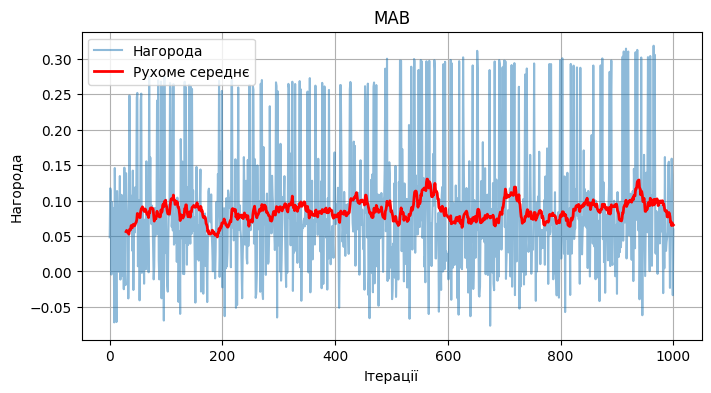

Time diff 0 days 00:00:04


In [109]:
analyse_alg('simulation', 'mab')